
Problems:
1- Classification : ( dog, cat --> binary classification) , ( Low, Miduim, High --> Categorical Classification )
2- Regression : predict actual value ( tempreature : 23, price : 14324 )
3- Clustering : divide data ( unkown data ) into groups, why ? based on what ? how many groups ?

Clustering Algorithms

Kmeans
Hirarchial Clustering
Task: what are types of clustering, when to use each ?

## Clustering With K Means - Python Tutorial

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


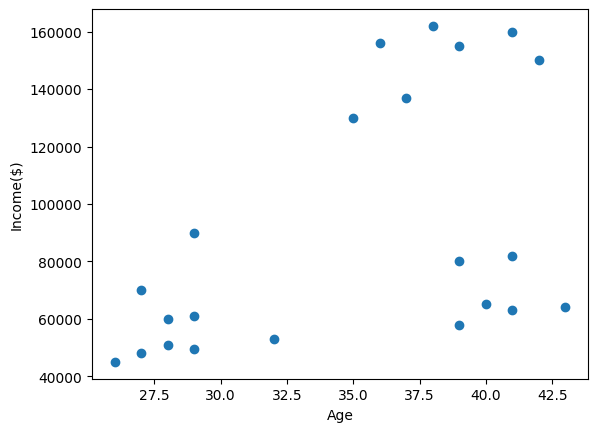

In [3]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [4]:
Final = df.drop(["Name"],axis=1)
Final

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [5]:
KM = KMeans(n_clusters=3)
y_predicted = KM.fit_predict(df[['Age','Income($)']])
y_predicted


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [6]:
KM =KMeans(n_clusters=3)
y_predicted = KM.fit_predict(Final)
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [7]:
df['clustering'] = y_predicted
df

,Name,Age,Income($),clustering
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,2
5,Gautam,39,155000,2
6,David,41,160000,2
7,Andrea,38,162000,2
8,Brad,36,156000,2
9,Angelina,35,130000,0


In [8]:
KM.cluster_centers_

array([[3.60000000e+01, 1.33500000e+05],
       [3.32000000e+01, 6.26333333e+04],
       [3.92000000e+01, 1.56600000e+05]])

In [9]:
df

,Name,Age,Income($),clustering
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,2
5,Gautam,39,155000,2
6,David,41,160000,2
7,Andrea,38,162000,2
8,Brad,36,156000,2
9,Angelina,35,130000,0


In [11]:
df1 = df[df.clustering==0]  
df2 = df[df.clustering==1]  
df3 = df[df.clustering==2]

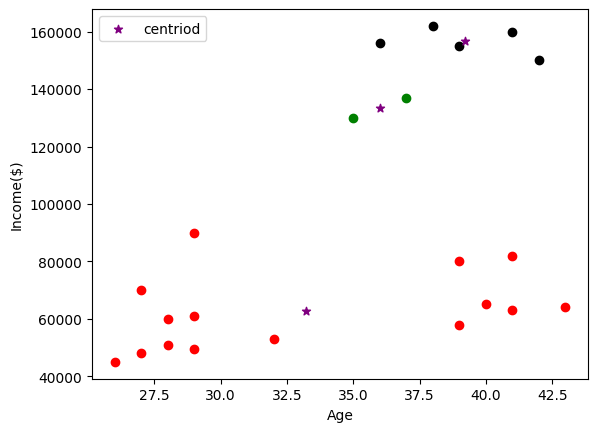

In [14]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1],color='purple',marker='*',label='centriod' )
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [15]:
print(df.Age.min())
print(df.Age.max())
print(df["Income($)"].min())
print(df["Income($)"].max())

26
43
45000
162000


### Normalization
          0:1 , -1:1 , 80,90

#### Preprocessing using min max scaler

In [16]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [17]:
df["Income($)"].max()

1.0000000000000002

In [18]:
df["Income($)"].min()

0.0

In [19]:
df.head()

,Name,Age,Income($),clustering
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


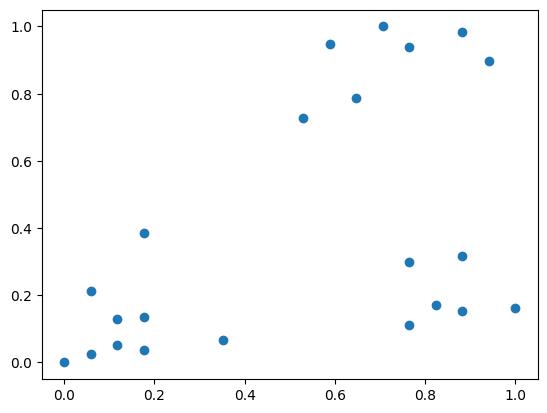

In [20]:
plt.scatter(df.Age,df['Income($)'])

In [23]:
kM = KMeans(n_clusters=3)
y_predicted = KM.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [25]:
df['clustering']=y_predicted
df.head()

,Name,Age,Income($),clustering,cluster
0,Rob,0.058824,0.213675,0,0
1,Michael,0.176471,0.384615,0,0
2,Mohan,0.176471,0.136752,0,0
3,Ismail,0.117647,0.128205,0,0
4,Kory,0.941176,0.897436,1,1


In [26]:
KM.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

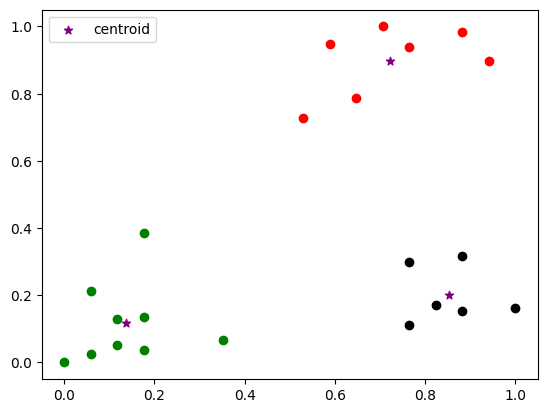

In [27]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

## Elbow Plot

In [28]:
sse = []
for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [29]:
sse

[5.434011511988179,
 2.4571335359046356,
 0.4750783498553096,
 0.36986589192348335,
 0.29715642665173914,
 0.2407627035421819,
 0.22069208544177496,
 0.1420361384295375,
 0.1131481285582519,
 0.1022352292814098,
 0.08182809731215665,
 0.06167706637385459,
 0.038101510924463636,
 0.036170816059468355,
 0.026861033825810676,
 0.017977363432513813,
 0.011033819491365383,
 0.010891982323088691,
 0.0070987780707415064]

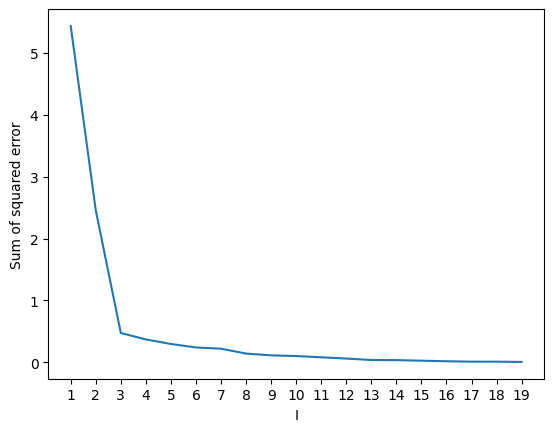

In [30]:
plt.xlabel('I')
plt.ylabel('Sum of squared error')
plt.xticks(range(1,20))
plt.plot(range(1,20),sse)